In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb

In [3]:
other = pd.read_csv('other.csv')

In [4]:
personal= pd.read_csv('personal.csv')

In [5]:
public= pd.read_csv('public.csv')

In [14]:
commuting= pd.read_csv('commuting.csv')

<IPython.core.display.Javascript object>


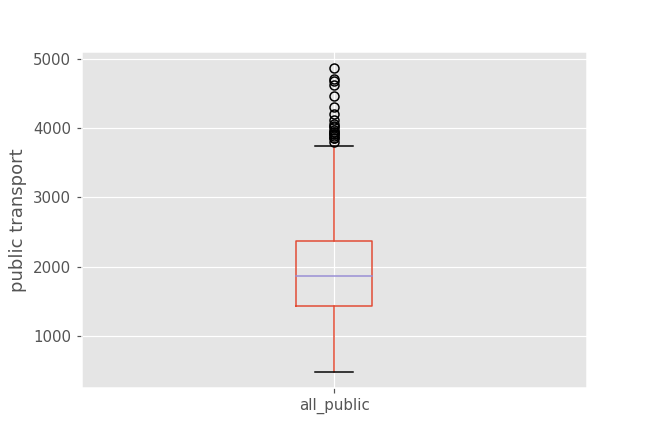

In [19]:
fig,axes = plt.subplots()
commuting['all_public'][commuting.all_public < 5000].plot(kind='box',ax=axes)
axes.set_ylabel('public transport')
fig.savefig('p1.png')

<IPython.core.display.Javascript object>


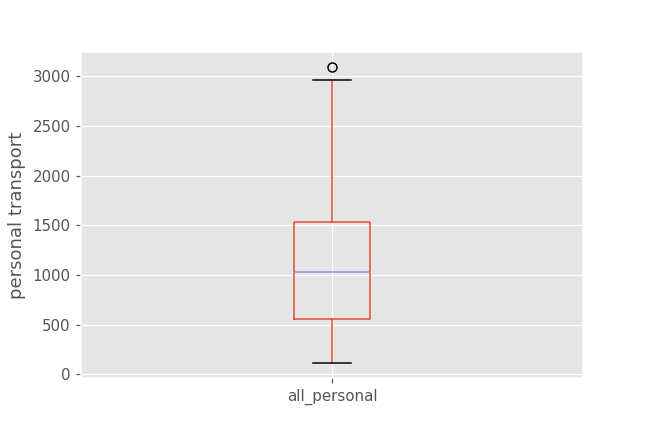

In [20]:
fig,axes = plt.subplots()
commuting['all_personal'][commuting.all_personal < 5000].plot(kind='box',ax=axes)
axes.set_ylabel('personal transport')
fig.savefig('p2.png')

<IPython.core.display.Javascript object>


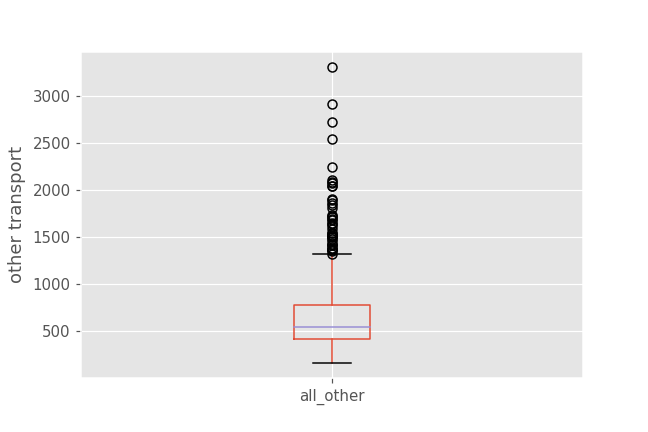

In [21]:
fig,axes = plt.subplots()
commuting['all_other'][commuting.all_other < 5000].plot(kind='box',ax=axes)
axes.set_ylabel('other transport')
fig.savefig('p3.png')

In [4]:
other.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 8 columns):
geography         964 non-null object
geography code    964 non-null object
all_other         964 non-null int64
age               964 non-null float64
qualification     964 non-null float64
distance          964 non-null float64
hour              964 non-null float64
gender            964 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 60.3+ KB


In [14]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.015, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [15]:
# split the DataFrame into predictors and response
predictors_other = other[['age','qualification','distance','hour','gender']]
response_other = other[['pop_index']]

In [16]:
# use stepwise regression on the bike_rental dataset
list_other = stepwise_selection(X=predictors_other, y=response_other)
print("The predictors that are selected by stepwise regression are:")
print(list_other)

Add  distance                       with p-value 2.23582e-169
Add  hour                           with p-value 2.73423e-21
Add  age                            with p-value 0.000634084
The predictors that are selected by stepwise regression are:
['distance', 'hour', 'age']


In [17]:
predictors_personal = personal[['age','qualification','distance','hour','gender']]
response_personal = personal[['pop_index']]

In [18]:
list_personal = stepwise_selection(X=predictors_personal, y=response_personal)
print("The predictors that are selected by stepwise regression are:")
print(list_personal)

Add  gender                         with p-value 8.11596e-99
Add  qualification                  with p-value 7.05883e-109
Add  age                            with p-value 1.90119e-10
The predictors that are selected by stepwise regression are:
['gender', 'qualification', 'age']


In [19]:
predictors_public = public[['age','qualification','distance','hour','gender']]
response_public = public[['pop_index']]

In [20]:
list_public = stepwise_selection(X=predictors_public, y=response_public)
print("The predictors that are selected by stepwise regression are:")
print(list_public)

Add  qualification                  with p-value 1.83269e-90
Add  age                            with p-value 1.96305e-45
Add  distance                       with p-value 2.60238e-15
Add  hour                           with p-value 5.63489e-07
Add  gender                         with p-value 0.00106324
The predictors that are selected by stepwise regression are:
['qualification', 'age', 'distance', 'hour', 'gender']
